<a href="https://colab.research.google.com/github/fujii-hcu/Prog2kakushin/blob/main/work2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

numpyを使用したプログラムを作成

生成枚数 (2～7): 5


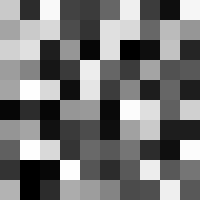

時計回りに 90 度回転


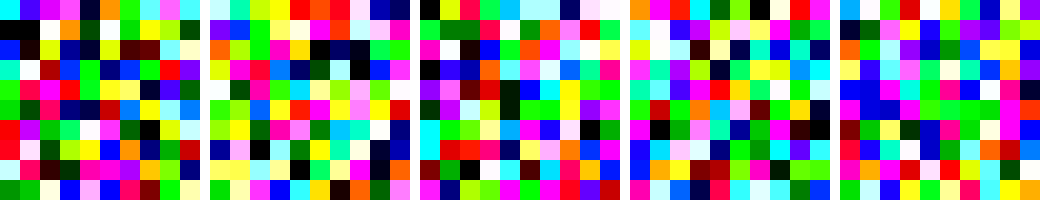

何枚目？(1～5)：1
BINGO !!
正解時間 20秒


In [5]:
import numpy as np
import cv2
import sys
from google.colab.patches import cv2_imshow
import random
import time
def create_img():
  img = np.zeros( (200, 200,3), np.uint8 )
  for i in range(0,200,20):
    for j in range(0,200,20):
      rgb=np.random.randint(0,3)
      if rgb==0:
       img[i:i+20,j:j+20]=[np.random.randint(0,11)*25,np.random.randint(0,2)*255,np.random.randint(0,2)*255]
      elif rgb==1:
        img[i:i+20,j:j+20]=[np.random.randint(0,2)*255,np.random.randint(0,11)*25,np.random.randint(0,2)*255]
      else:
        img[i:i+20,j:j+20]=[np.random.randint(0,2)*255,np.random.randint(0,2)*255,np.random.randint(0,11)*25]
  return img

n=int(input("生成枚数 (2～7): "))
data=[]
img=create_img()
data.append(img)
for i in range(n-1):
  data.append(create_img())
random.shuffle(data)
img2=np.zeros((200,210*n,3), np.uint8)
img2[:,:]=[255,255,255]
for i in range(n):
  a=i*210
  img2[0:200,a:a+200]=data[i]
img_gray=cv2.cvtColor( img, cv2.COLOR_BGR2GRAY )
img_gray_rot=img_gray
n_rot=np.random.randint(1,4)
for i in range(n_rot):
  img_gray_rot=np.rot90(img_gray_rot)
cv2_imshow(img_gray_rot)
print("時計回りに "+str(n_rot*90)+" 度回転")
cv2_imshow(img2)


t1 = time.time()

answer=int(input("何枚目？(1～"+str(n)+")："))
if np.all(data[answer-1]==img):
  print("BINGO !!")
  t2 = time.time()
  print(f"正解時間 {int(t2-t1)}秒")
else:
  print("WRONG !!")
  for i in range(n):
    if np.all(data[i]==img):
      print("ANSWER IS "+str(i+1)+" !!!")
      break
  print("YOU ARE STUPID !!!!!")